<a href="https://colab.research.google.com/github/cyy122yyy/Exploring-Pokemon-Data/blob/main/DATA100_studentcopy_midterms_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REQUIRED INFORMATION:


*  Cheska Ysabelle G. Young
*  BSFIN 3RD YEAR
*  10/23/2024 4:58 PM

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from numpy.testing import assert_almost_equal
sns.set_theme()

Links to downlaod the Walmart sales dataset. Choose one of the two: <br>
 1) Via GoogleDrive (just download this file): https://drive.google.com/file/d/1pKDG_mGCorv_N6fKfEunRS_pP9ZyrWEp/view?usp=sharing <br>
2) Via Github (there is a download button): https://github.com/efvaldez1/data100/blob/main/walmart-sales-dataset-of-45stores.csv <br>

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States. You are applying as a data analyst for the company and have been asked to do exploratory analysis on 45 of their stores. Basis for hiring will be coming from the score that you will get in this technical exam. The following fields have been provided to you:

Store - Numbers ranging from 1 to 45 to indicate unique identifier of the store <br>
Weekly_Sales - Total sales for a given week. It is in the format of dd-mm-yyyy. The date starts from 05-02-2010 <br>
Holiday_Flag - If the week has a special Holiday or not. 1 if there is holiday 0 if not. <br>
Temperature - Average Temperature of the week of sales <br>
Fuel_Price - Price of the Fuel in the region of the given store <br>
CPI - Customer Price Index, measures the monthly change in prices paid by U.S. consumers. <br>
Unemployment - Unemployment of the given store region <br>


In [4]:
walmart_df = pd.read_csv('walmart-sales-dataset-of-45stores.csv') #your path to the walmart dataset
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'],format='%d-%m-%Y')
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


### How many rows and columns does this dataset have? (1pt)


In [6]:
rows, columns = walmart_df.shape
print(f"rows = {rows}, columns = {columns}")

rows = 6435, columns = 8


### What are the column names and data type for each column? (1pt) Hint: can be done in one line

In [7]:
print(walmart_df.dtypes)

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object


### Check if the data contains duplicates (1pt)

In [8]:
walmart_df.duplicated().any()

False

### Check if the data contains null values. If there are null values which columns have null values. (1pt)

In [9]:
null_values = walmart_df.isnull().sum()

null_columns = null_values[null_values > 0]
print(null_columns)

Series([], dtype: int64)


### Introduce the following columns as part of the features for walmart dataframe: (4pts)
- Year - extract year from Weekly Sales column
- Month - extract month from Weekly Sales column
- Season: - field which contains the season (spring, summer, fall, winter). Use the logic below <br>
 **spring** March 1 to May 31 <br>
 **summer** June to Aug 31 <br>
 **fall** Sept 1 to Nov 30 <br>
 **winter** Dec 1 to Feb 28 <br>

In [12]:
walmart_df['Year'] = walmart_df['Date'].dt.year
walmart_df['Month'] = walmart_df['Date'].dt.month

def get_season(row):
    month = row['Month']
    day = row['Date'].day

    if (month == 3 and day >= 1) or (month in [4, 5]):
        return 'spring'
    elif (month == 6 and day >= 1) or (month in [7, 8]):
        return 'summer'
    elif (month == 9 and day >= 1) or (month in [10, 11]):
        return 'fall'
    else:
        return 'winter'

walmart_df['Season'] = walmart_df.apply(get_season, axis=1)

walmart_df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring


In [13]:
walmart_df
#the result of printing/showing the variable walmart_df below should show the new features 'year', 'month', 'season'

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Season
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,winter
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,winter
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,winter
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,winter
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,spring
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,fall
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,fall
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,fall
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,fall


### Show the top 10 stores with highest number of sales for the year 2011 (2pts)

In [14]:
walmart_2011 = walmart_df[walmart_df['Year'] == 2011]
store_sales_2011 = walmart_2011.groupby('Store')['Weekly_Sales'].sum()
top_10_stores = store_sales_2011.sort_values(ascending=False).head(10)

print(top_10_stores)

Store
4     1.110923e+08
20    1.098370e+08
14    1.060963e+08
13    1.045375e+08
10    9.891689e+07
2     9.860788e+07
27    9.192268e+07
1     8.092192e+07
6     8.052876e+07
39    7.577760e+07
Name: Weekly_Sales, dtype: float64


### What's the percentage contribution of the top 10 stores with respect to the overall sales in 2011? (2pts)

In [16]:
top_10_sales_sum = top_10_stores.sum()
total_sales_2011 = store_sales_2011.sum()
percentage_contribution = (top_10_sales_sum / total_sales_2011) * 100

print(f"Percentage contribution of the top 10 stores with respect to the overall sales in 2011: {percentage_contribution:.2f}%")

Percentage contribution of the top 10 stores with respect to the overall sales in 2011: 39.14%


### Do weeks with holidays have higher sales compared to non-holiday days? Show how you were able to justify this in code (2pt)

In [17]:
average_sales = walmart_df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

print(average_sales)

if average_sales[1] > average_sales[0]:
    print("Weeks with holidays have higher sales compared to non-holiday weeks.")
else:
    print("Weeks with holidays do not have higher sales compared to non-holiday weeks.")

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64
Weeks with holidays have higher sales compared to non-holiday weeks.


### Calculate How much sales does each season in a year contribute? (2pts)

In [18]:
season_sales = walmart_df.groupby('Season')['Weekly_Sales'].sum()

print("Total sales contribution by season:")
print(season_sales)

total_sales_year = walmart_df['Weekly_Sales'].sum()
percentage_season_contribution = (season_sales / total_sales_year) * 100

print("\nPercentage contribution by season:")
print(percentage_season_contribution)

Total sales contribution by season:
Season
fall      1.576562e+09
spring    1.796771e+09
summer    1.885721e+09
winter    1.478165e+09
Name: Weekly_Sales, dtype: float64

Percentage contribution by season:
Season
fall      23.400778
spring    26.669331
summer    27.989606
winter    21.940284
Name: Weekly_Sales, dtype: float64


### Recreate the chart as shown (Link to image via GoogleDrive https://drive.google.com/file/d/177L1Kpj2T2IzEoL3U3hX1kIqLPcrM3fI/view?usp=sharing)

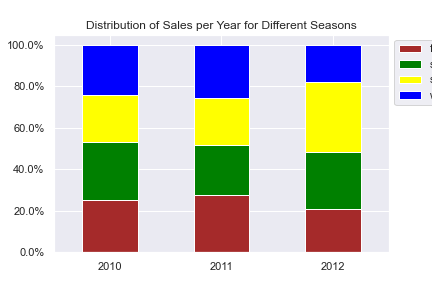

 which shows the Distribution of Sales per Year for Different Seasons. In the last line of your answer you should have a code to save the file as "<YOURFULLNAME>_distribution_per_year.png" using Matplotlib's .savefig() function  **(6pts)**

In [20]:
season_year_sales = walmart_df.groupby(['Year', 'Season'])['Weekly_Sales'].sum().reset_index()

print(season_year_sales)

    Year  Season  Weekly_Sales
0   2010    fall  5.972831e+08
1   2010  spring  6.000431e+08
2   2010  summer  6.124664e+08
3   2010  winter  4.790935e+08
4   2011    fall  6.142714e+08
5   2011  spring  5.875311e+08
6   2011  summer  6.082841e+08
7   2011  winter  6.381134e+08
8   2012    fall  3.650072e+08
9   2012  spring  6.091970e+08
10  2012  summer  6.649705e+08
11  2012  winter  3.609581e+08


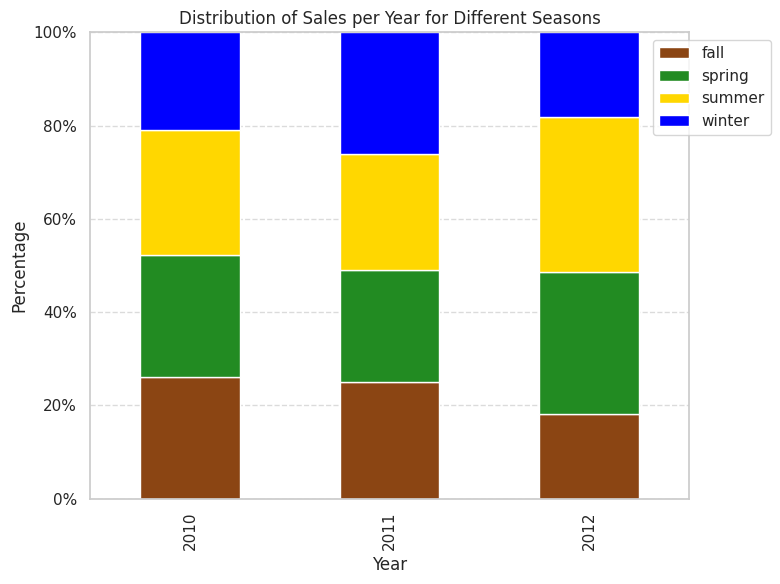

In [26]:
plot_data = season_year_sales.copy()

total_sales_per_year = plot_data.groupby('Year')['Weekly_Sales'].sum().reset_index()
plot_data = plot_data.merge(total_sales_per_year, on='Year', suffixes=('', '_Total'))
plot_data['Percentage'] = (plot_data['Weekly_Sales'] / plot_data['Weekly_Sales_Total']) * 100

plot_data = plot_data.pivot(index='Year', columns='Season', values='Percentage')

ax = plot_data.plot(kind='bar', stacked=True,
                    color=['#8B4513', '#228B22', '#FFD700', '#0000FF'],  # brown, green, yellow, blue
                    figsize=(8, 6))
plt.title('Distribution of Sales per Year for Different Seasons')
plt.xlabel('Year')
plt.ylabel('Percentage')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()

plt.savefig('CheskaYsabelleYoung_distribution_per_year.png', bbox_inches='tight')

plt.show()

### Recreate the chart as shown (link to chart via GoogleDrive: https://drive.google.com/file/d/1ixU0f-ByGqLBS6W96sOxub8hVcv0hSrG/view?usp=sharing )

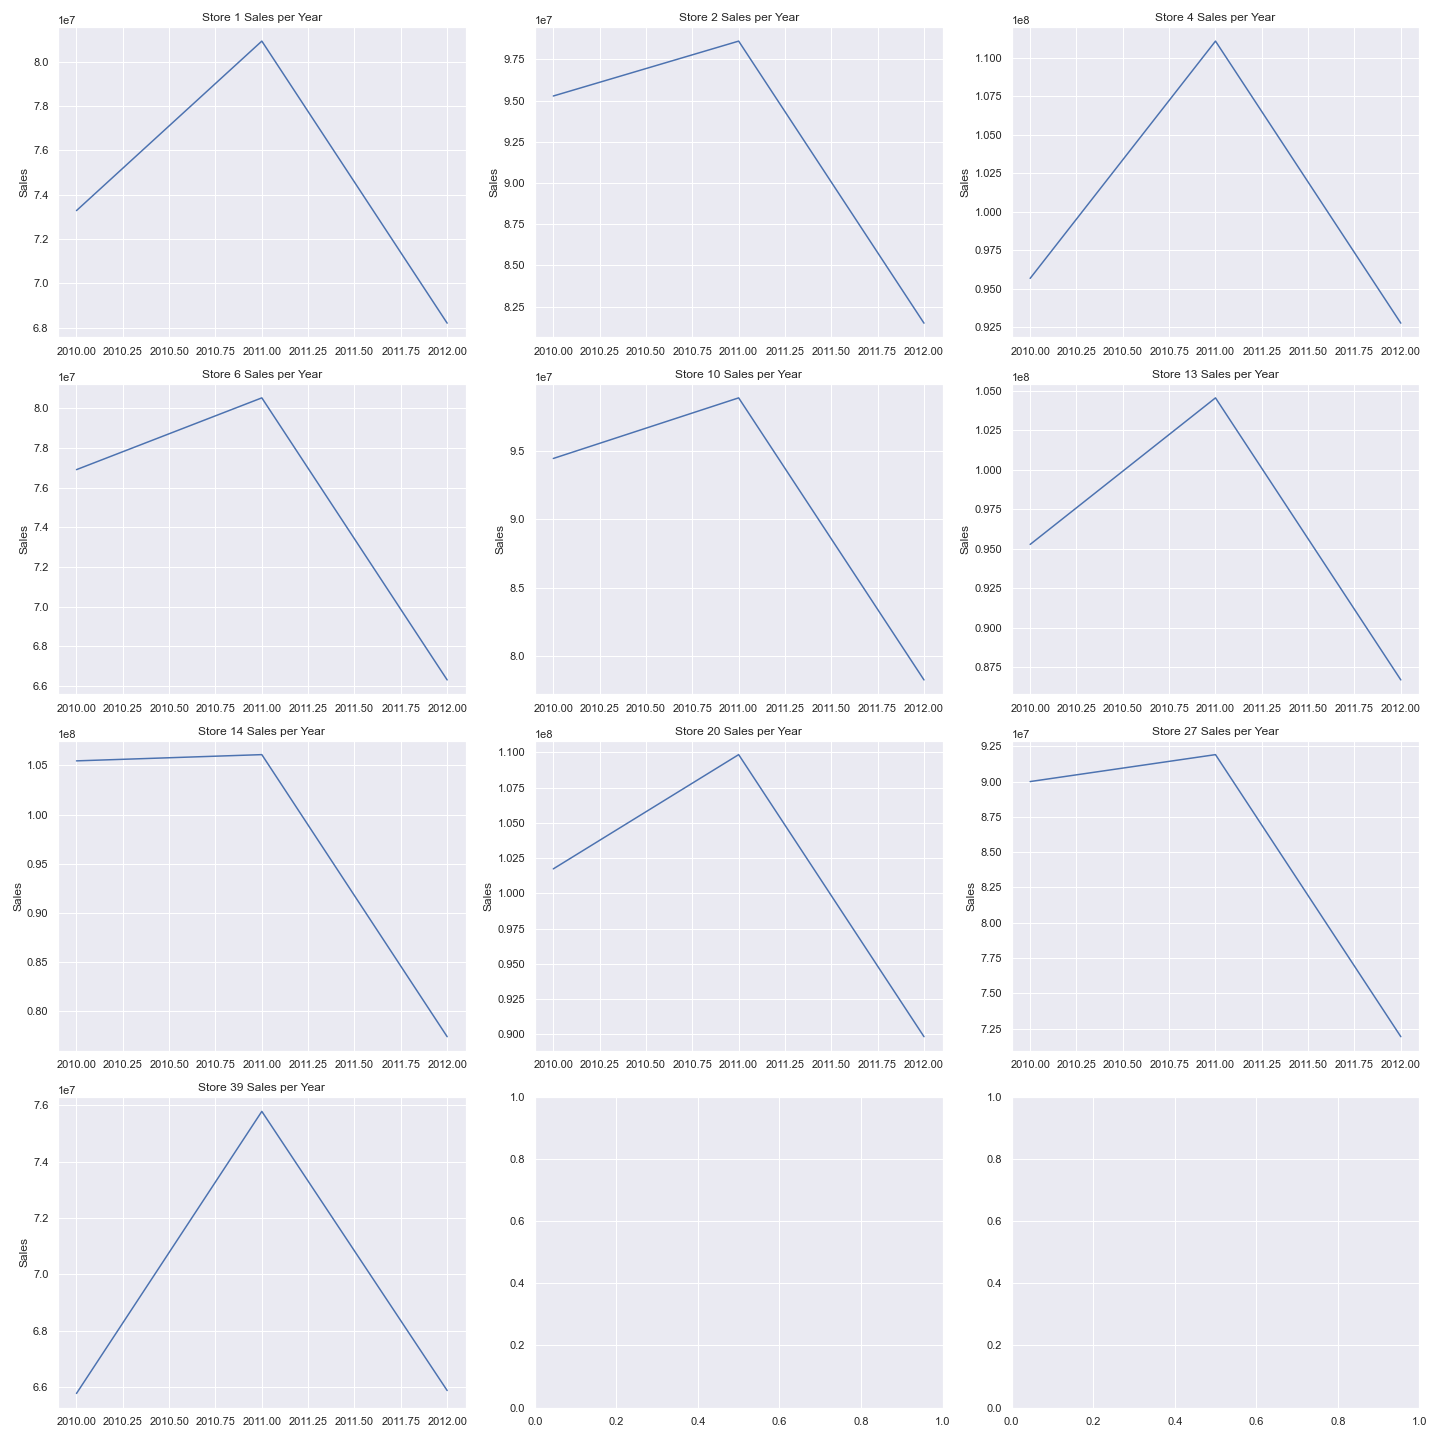

which shows the sales per year from the top 10 stores in 2011 (8pts)

First step calculate the weekly sales per year for the top 10 stores in 2011 **(3points out of 8points)**

In [28]:
walmart_df = pd.read_csv('walmart-sales-dataset-of-45stores.csv')
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'], format='%d-%m-%Y')

walmart_df['Year'] = walmart_df['Date'].dt.year

yearly_store_sales = walmart_df.groupby(['Store', 'Year'])['Weekly_Sales'].sum().reset_index()

top_10_stores_2011 = (yearly_store_sales[yearly_store_sales['Year'] == 2011]
                      .nlargest(10, 'Weekly_Sales')['Store']
                      .tolist())

sales_per_year = (walmart_df[walmart_df['Store'].isin(top_10_stores_2011)]
                  .groupby(['Store', 'Year'])['Weekly_Sales']
                  .sum()
                  .reset_index())

print(sales_per_year)

    Store  Year  Weekly_Sales
0       1  2010  7.327883e+07
1       1  2011  8.092192e+07
2       1  2012  6.820206e+07
3       2  2010  9.527786e+07
4       2  2011  9.860788e+07
5       2  2012  8.149670e+07
6       4  2010  9.568047e+07
7       4  2011  1.110923e+08
8       4  2012  9.277119e+07
9       6  2010  7.691232e+07
10      6  2011  8.052876e+07
11      6  2012  6.631505e+07
12     10  2010  9.447220e+07
13     10  2011  9.891689e+07
14     10  2012  7.822862e+07
15     13  2010  9.527274e+07
16     13  2011  1.045375e+08
17     13  2012  8.670746e+07
18     14  2010  1.054622e+08
19     14  2011  1.060963e+08
20     14  2012  7.744140e+07
21     20  2010  1.017331e+08
22     20  2011  1.098370e+08
23     20  2012  8.982771e+07
24     27  2010  9.001318e+07
25     27  2011  9.192268e+07
26     27  2012  7.192006e+07
27     39  2010  6.578228e+07
28     39  2011  7.577760e+07
29     39  2012  6.588566e+07


Second step visualize the sales per store for each year using seaborns lineplot https://seaborn.pydata.org/generated/seaborn.lineplot.html . In the last line of your answer you should have a code to save the file as "<YOURFULLNAME>_store_sales_per_year.png" using Matplotlib's .savefig() function **(5 points out of 8 points)**

<Figure size 1500x1000 with 0 Axes>

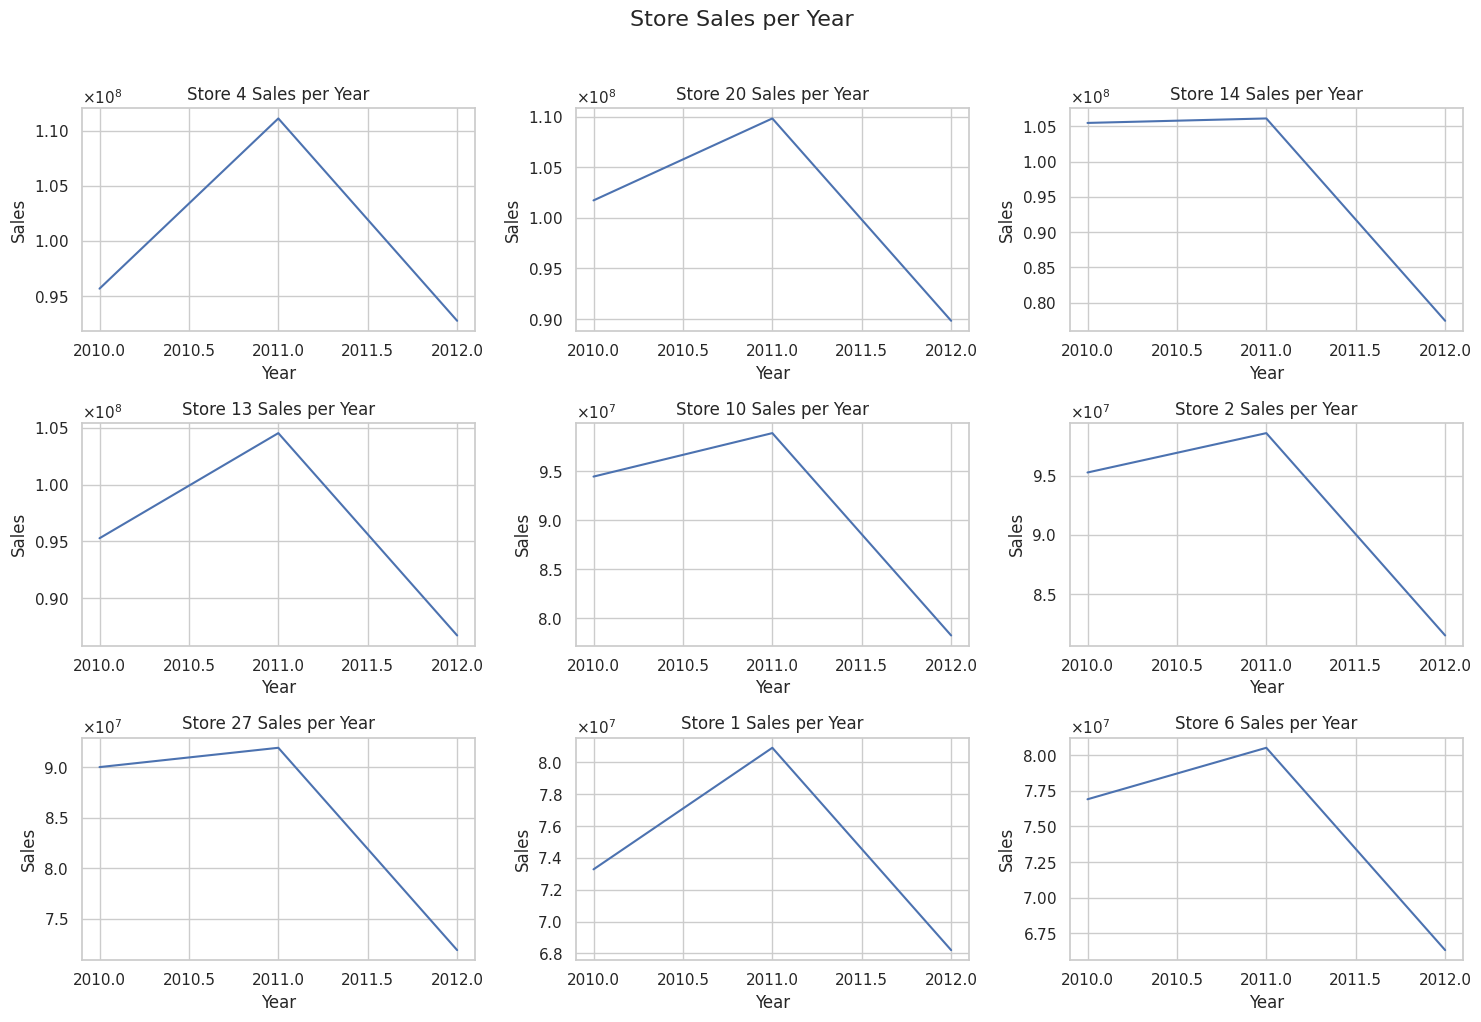

In [29]:
plt.figure(figsize=(15, 10))

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle('Store Sales per Year', fontsize=16, y=1.02)

axes_flat = axes.flatten()

for idx, store in enumerate(top_10_stores_2011[:9]):
    store_data = sales_per_year[sales_per_year['Store'] == store]

    sns.lineplot(data=store_data,
                x='Year',
                y='Weekly_Sales',
                ax=axes_flat[idx])

    axes_flat[idx].set_title(f'Store {store} Sales per Year')
    axes_flat[idx].set_xlabel('Year')
    axes_flat[idx].set_ylabel('Sales')

    if store_data['Weekly_Sales'].max() > 1e6:
        axes_flat[idx].yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
        axes_flat[idx].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

plt.tight_layout()

plt.savefig('CheskaYsabelleYoung_store_sales_per_year.png', bbox_inches='tight', dpi=300)